In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('data2.csv')
df.head()

,Sal,Pro,Sec,Crate,Ofc,Rate,Obr,Tre,Sco,Sum,Tos,Mat,Lda,Pre,Pop,Hpol,Hpoh,Clp,Beg
0,61174,17658,1.00,1159.05,25000,1511.36,42.54,0.75,3,28,0.107,0,20220715,52700,25000,23000,25000,43250,50000
1,60760,2506,0.83,682.13,18600,1616.27,5.92,0.67,12,45,0.267,0,20220714,14250,18600,15000,18600,16450,18400
2,10383,-13496,1.00,1727.38,13000,1623.41,11.58,1.00,4,56,0.071,0,20220701,12000,13000,9900,11600,14300,17150
3,418527,24895,1.00,111.26,16200,955.00,1.39,0.88,0,59,0.000,0,20220623,9330,16200,14200,16200,11000,14600
4,3879,-7665,1.00,1845.11,16000,1442.95,12.43,0.89,2,54,0.037,0,20220624,12400,16000,12000,14000,17350,20600


In [3]:
x = df[["Sal","Pro","Sec","Crate","Ofc","Rate","Obr","Tre","Sco","Sum","Tos","Mat","Lda","Pre","Pop","Hpol","Hpoh"]].values
y = df["Beg"].values

In [4]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(x)

In [5]:
features = ["Sal","Pro","Sec","Crate","Ofc","Rate","Obr","Tre","Sco","Sum","Tos","Mat","Lda","Pre","Pop","Hpol","Hpoh"]
x = pd.DataFrame(x, columns=features)
x.head()

,Sal,Pro,Sec,Crate,Ofc,Rate,Obr,Tre,Sco,Sum,Tos,Mat,Lda,Pre,Pop,Hpol,Hpoh
0,-0.017379,0.631540,0.133981,0.024796,0.364185,1.463341,1.767094,-0.087796,0.057540,-0.534114,0.223540,0.0,1.517790,2.281063,0.364185,0.434608,0.301952
1,-0.018684,-0.061151,-0.051284,-0.091708,-0.043601,1.660642,-0.599653,-0.542475,1.932381,0.629142,1.498581,0.0,1.517747,0.197076,-0.043601,-0.105755,-0.067747
2,-0.177497,-0.792702,0.133981,0.163630,-0.400414,1.674070,-0.233848,1.333076,0.265856,1.381837,-0.063344,0.0,1.517191,0.075126,-0.400414,-0.450236,-0.472105
3,1.109178,0.962388,0.133981,-0.231163,-0.196521,0.417012,-0.892427,0.651057,-0.567407,1.587117,-0.629144,0.0,1.513855,-0.069587,-0.196521,-0.159791,-0.206384
4,-0.198001,-0.526131,0.133981,0.192390,-0.209264,1.334684,-0.178912,0.707892,-0.150776,1.244983,-0.334291,0.0,1.513897,0.096806,-0.209264,-0.308391,-0.333468


In [6]:
pca = PCA(2)
prin_com = pca.fit_transform(x)
prin_df = pd.DataFrame(data=prin_com, columns = ['x1', 'x2'])
prin_df.head()

,x1,x2
0,1.205099,-1.879683
1,-0.083630,-2.704081
2,-0.832525,-2.366025
3,-0.214563,-0.261103
4,-0.469805,-1.658503


In [7]:
sum(pca.explained_variance_ratio_)

0.4108559770132041

In [8]:
for i in range(2,18):
    pca = PCA(i)
    prin_com = pca.fit_transform(x)
    prin_df = pd.DataFrame(data=prin_com)
    print(sum(pca.explained_variance_ratio_))

0.4108559770132041
0.528995549746388
0.6325757515892236
0.7098058051895163
0.7717722767870359
0.8279624105215119
0.878664323444144
0.9262831206998473
0.966192422643886
0.9830528896725299
0.9896463652496043
0.9955947858464861
0.9997443281692793
1.0000000000000002
1.0000000000000002
1.0000000000000002


In [9]:
pca = PCA(10)
prin_com = pca.fit_transform(x)
prin_x = pd.DataFrame(data=prin_com, columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10'])
prin_x.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,1.205099,-1.879683,1.046749,-0.556439,0.598283,-0.305360,-1.482252,1.025012,1.834560,0.044800
1,-0.083630,-2.704081,0.389579,0.758274,-1.262138,-0.109433,0.808911,-0.137527,0.734426,-1.116550
2,-0.832525,-2.366025,0.687348,-1.534068,0.068465,0.125492,0.322529,-0.704453,-0.543645,-0.436499
3,-0.214563,-0.261103,2.334925,-1.316634,-0.610274,-0.044038,0.740897,-0.746776,-0.520203,-0.368955
4,-0.469805,-1.658503,0.666256,-1.636221,0.116184,0.107497,0.430997,-0.531426,-0.153834,-0.579638


PIPELINE

In [10]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LassoCV , ElasticNetCV , RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA 
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.cross_decomposition import PLSRegression as  PLS
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    prin_x, y, test_size=0.2, random_state=42)

In [12]:
cv = ShuffleSplit(n_splits=5 , test_size=0.3, random_state=42)
pipe_linear = Pipeline([
                ('msl', MinMaxScaler()),
                ('poly', PolynomialFeatures()),
                 ('fit', LinearRegression())])
pipe_lasso = Pipeline([
                ('msl', MinMaxScaler()),
                ('poly', PolynomialFeatures()),
                 ('fit', Lasso(random_state = 42))])
pipe_ridge = Pipeline([
                ('msl', MinMaxScaler()),
                ('poly', PolynomialFeatures()),
                 ('fit', Ridge(random_state = 42))])
pipe_pca = Pipeline([
                ('msl', MinMaxScaler()),
                ('pca', PCA()),
                 ('fit', Ridge(random_state = 42))])
pipe_pls = Pipeline([
                ('msl', MinMaxScaler()),
                 ('fit', PLS())])
pipe_gbr = Pipeline([
                ('msl', MinMaxScaler()),
                 ('fit', GBR())])
pipe_rfr = Pipeline([
                ('msl', MinMaxScaler()),
                 ('fit', RFR())])
pipe_svr = Pipeline([
                ('msl', MinMaxScaler()),
                 ('fit', SVR())])

pipe_KR = Pipeline([
                ('msl', MinMaxScaler()),
                 ('fit', KernelRidge())])
                 
                 
### 

grid_params_linear = [{
    "poly__degree" : np.arange(1,3), 
    "fit__fit_intercept" : [True, False], 
}]
grid_params_lasso = [{
    "poly__degree" : np.arange(1,3),
    "fit__tol" : np.logspace(-5,0,10) ,
    "fit__alpha" : np.logspace(-5,1,10) ,     
                     }]
grid_params_pca = [{
    "pca__n_components" : np.arange(2,8)
}]
grid_params_ridge = [{
    "poly__degree" : np.arange(1,3),
    "fit__alpha" : np.linspace(2,5,10) ,
    "fit__solver" : [ "cholesky","lsqr","sparse_cg"] ,
    "fit__tol" : np.logspace(-5,0,10) ,
                     }]
grid_params_pls = [{
    "fit__n_components" : np.arange(2,8)
}]
min_samples_split_range = [0.5, 0.7 , 0.9]

grid_params_gbr =[{
    "fit__max_features" : ["sqrt","log2"] ,
    "fit__loss" : ["ls","lad","huber","quantile"] , 
    "fit__max_depth" : [5,6,7,8] ,
    "fit__min_samples_split" : min_samples_split_range ,
}]
grid_params_rfr =[{
    "fit__max_features" : ["sqrt","log2"] , 
    "fit__max_depth" : [5,6,7,8] ,
    "fit__min_samples_split" : min_samples_split_range ,
}]
grid_params_svr =[{
    "fit__kernel" : ["rbf", "linear"] ,
    "fit__degree" : [2, 3, 5] , 
    "fit__gamma" : np.logspace(-5,1,10) ,
}]
grid_params_KR =[{
    "fit__kernel" : ["rbf","linear"] , 
    #"fit__gamma" : np.logspace(-5,1,10) ,
    "fit__gamma" : np.logspace(-5,1,10) ,
}]
pipe = [
    pipe_linear , pipe_lasso ,  pipe_pca ,
    pipe_ridge , pipe_pls , pipe_gbr , 
    pipe_rfr , pipe_svr , pipe_KR 
]

params = [
    grid_params_linear , grid_params_lasso , grid_params_pca,
    grid_params_ridge , grid_params_pls , grid_params_gbr ,
    grid_params_rfr , grid_params_svr , grid_params_KR
]

jobs = 20

grid_dict = {
    0: 'Linear', 
    1: 'Lasso', 
    2: 'pca regression' , 
    3: 'Ridge' ,
    4: 'PLSRegression',
    5: "GradientDescentRegressor" ,
    6: "RandomForestRegressor" ,
    7: "SupportVectorRegressor" ,
    8: "Kernel RidgeRegression"
            }

model_mse = {}
model_r2 = {}
model_best_params = {}

for idx , (param , model) in enumerate(zip(params , pipe)) :
    search = GridSearchCV(model, param, scoring  = "neg_mean_squared_error" , 
                          cv=cv , n_jobs=jobs , verbose=-1 )
    search.fit(X_train , y_train)
    y_pred = search.predict(X_test)
    model_mse[grid_dict.get(idx)] = mse(y_test, y_pred)  
    model_r2[grid_dict.get(idx)] = r2(y_test, y_pred)  
    model_best_params[grid_dict.get(idx)] = search.best_params_
print("finish")

c:\users\so yeon jo\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


finish


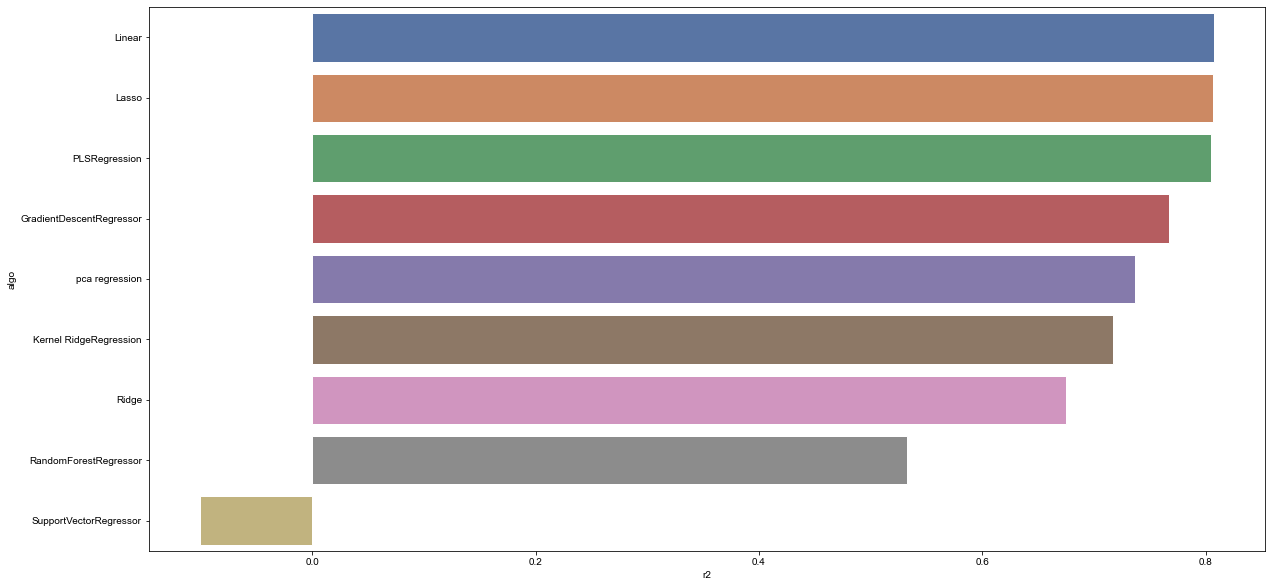

In [13]:
fig ,ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale = 2)
output = pd.DataFrame([model_r2.keys() , model_r2.values()], index = ["algo","r2"]).T
output.sort_values(["r2"], ascending= False ,inplace=True)
ax = sns.barplot(y="algo", x="r2", data=output)
plt.show()

In [14]:
model_best_params

{'Linear': {'fit__fit_intercept': True, 'poly__degree': 1},
 'Lasso': {'fit__alpha': 10.0,
  'fit__tol': 0.07742636826811278,
  'poly__degree': 1},
 'pca regression': {'pca__n_components': 7},
 'Ridge': {'fit__alpha': 2.0,
  'fit__solver': 'lsqr',
  'fit__tol': 0.0016681005372000592,
  'poly__degree': 1},
 'PLSRegression': {'fit__n_components': 3},
 'GradientDescentRegressor': {'fit__loss': 'ls',
  'fit__max_depth': 8,
  'fit__max_features': 'sqrt',
  'fit__min_samples_split': 0.5},
 'RandomForestRegressor': {'fit__max_depth': 7,
  'fit__max_features': 'sqrt',
  'fit__min_samples_split': 0.5},
 'SupportVectorRegressor': {'fit__degree': 2,
  'fit__gamma': 10.0,
  'fit__kernel': 'rbf'},
 'Kernel RidgeRegression': {'fit__gamma': 1e-05, 'fit__kernel': 'linear'}}

In [15]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

print(mlr.score(X_train, y_train))

0.9055068261087472
